---
# ASSIGNMENT 3
---

##### Project Overview
---

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscrised.


There are four datasets:
 1. bank-addtional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
 2. bank-addtional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
 3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
 4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

##### This dataset contains:
---

Input variables:

*bank client data:*
1. -age (numeric)
2. -job : type of job (categorical: 'admin','bluecollar','entrepreneur','housemaid','management','retired', 'selfemployed','service','student','technician','unemployed','unknown')
3. -marital : marital status (categorical: 'disvorced', 'married', 'single', 'unknown';note:'divorced'means divorced or widowed)
4. -education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. -default: has credit in default? (categorical: 'no','yes','unknown')
6. -housing: has housing loan? (categorical: 'no','yes','unknown')
7. -loan: has personal loan? (categorical: 'no','yes','unknown')

*related with the last contact of the current campaign:*

8. -contact: contact communication type (categorical: 'cellular','telephone')
9. -month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. -day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. -duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*other attributes:*

12. -campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. -pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. -previous: number of contacts performed before this campaign and for this client (numeric)
15. -poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

*social and economic context attributes*

16. -emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. -cons.price.idx: consumer price index - monthly indicator (numeric)
18. -cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. -euribor3m: euribor 3 month rate - daily indicator (numeric)
20. -nr.employed: number of employees - quarterly indicator (numeric)

*Output variable (desired target):*

21. -y - has the client subscribed a term deposit? (binary: 'yes','no')

---
# Library
---

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

---
# Preprocessing
---

In [2]:
df_bank_full = pd.read_csv("bank-full.csv",sep= ';')

In [3]:
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Sekarang, akan mencari tahu ada berapa banyak baris dan kolom didalam dataset.

In [5]:
df_bank_full.shape

(45211, 17)

Diketahui bahwa didalam dataset, ada sebanyak 45211 baris dengan banyak kolom 17

Kita akan melihat kolom-kolom apa saja yang ada

In [6]:
df_bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Untuk melihat informasi dasar tentang kerangka data.

In [7]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Informasi yang dapat diketahui, yaitu ada 10 kolom dengan type object : job, marital, education, default, housing, loan, contact, month, poutcome dan ada 7 kolom dengn type numeric : age, balance, day, duration, campaign, pdays, previous. jumlah setiap kolom sama sebank 45211 yang menandakan tidak ada missing value pada data.


Selanjutnya, Kita akan mengubah tipe data object menjadi category.

In [8]:
df_bank_full['job'] = df_bank_full['job'].astype({'job':'category'})
df_bank_full['marital'] = df_bank_full['marital'].astype({'marital':'category'})
df_bank_full['education'] = df_bank_full['education'].astype({'education':'category'})
df_bank_full['default'] = df_bank_full['default'].astype({'default':'category'})
df_bank_full['housing'] = df_bank_full['housing'].astype({'housing':'category'})
df_bank_full['loan'] = df_bank_full['loan'].astype({'loan':'category'})
df_bank_full['contact'] = df_bank_full['contact'].astype({'contact':'category'})
df_bank_full['month'] = df_bank_full['month'].astype({'month':'category'})
df_bank_full['poutcome'] = df_bank_full['poutcome'].astype({'poutcome':'category'})
df_bank_full['y'] = df_bank_full['y'].astype({'y':'category'})

In [9]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


Selanjutnya, kita memeriksa central tendency dari data numerik pada dataset.

In [10]:
df_bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Dari hasil diatas adapun informasi yang dapat kita ketahui:
1. Age = Usia calon nasabah muda adalah 18 tahun dan usia calon nasabah tua adalah 95 tahun. Dan untuk rata-raton calon nasabah ada pada usia 41 tahun.

2. Balance = Rata-rata credit balance calon nasabah adalah 1362,3 (EUR) dengan jumlah balance paling kecil adalah -8019 (EUR) dan jumlah balance terbesar adalah 102,127 (EUR). Adapun standar deviasi pada kolom balance ini adalah 3044,77 yang mengindikasikan keberagaman nilai data ini.

3. Duration = Rata-rata durasi panggilan terakhir adalah 258 detik. Adapun waktu terpendek untuk suatu panggilan adalah 0 yang diketahui pada keterangan dataset bahwa nilai 0 pada kolom ini artinya bahwa staf marketing bank tidak berhasil menghubungi calon nasabah tersebut. Hal ini berakibat hilangnya kemungkinan calon nasabah mendaftarkan diri pada layanan kredit ini. Indikasinya adalah bahwa pada campaign kali ini, terdapat staf marketing bank yang tidak berhasil menghubungi calon nasabah. Selanjutnya, waktu terpanjang untuk suatu panggilan pada campaign kali ini adalah 4918 detik.

4. Campaign = Rata-rata banyaknya panggilan yang dilakukan staf marketing bank kepada setiap nasabah untuk kampanye kali ini adalah 2-3 kali dengan banyaknya panggilan paling sedikit adalah 1 kali dan paling banyak adalah 63 kali.

5. Pdays = Rata-rata banyaknya hari sejak panggilan terakhir (yang dilakukan staf marketing bank) pada campaign sebelum ini adalah sekitar 40 hari. Adapun nilai minimumnya adalah -1 hari dan nilai maksimum hari adalah 871. Pada keterangan disediakan keterangan bahwa nilai 999 pada kolom ini mengartikan bahwa client belum pernah dihubungi sebelumnya. Namun, pada data ini tidak terdapat nilai 999 pada kolom ini yang mengindikasikan bahwa client yang dihubungi pada campaign kali ini adalah client yang sudah pernah dihubungi sebelumnya.

6. Previous = Rata-rata banyaknya panggilan yang dilakukan staf marketing bank kepada setiap nasabah sebelum kampanye dilaksanakan 0-1 kali dengan banyaknya panggilan paling sedikit adalah 0 kali dan paling banyak adalah 275 kali.


---
# Data Cleaning
---

Kita akan memeriksaa jika ada data yang terduplicate.

In [11]:
df_bank_full.duplicated().sum()

0

Berdasarkan hasil diatas, dapat diketahui tidak ada duplikat data didalam dataset.

Selanjutnya, karena di kolom durasi/waktu terpendek 0, itu yang artinya staff tidak bisa menghubungi calon nasabah. Untuk itu kita akan menghapus duration == 0.

In [12]:
df_duration_0 = df_bank_full[df_bank_full['duration']==0].index
df_bank_full.drop(df_duration_0, inplace=True)

Kita akan mengecek kembali dimensi data.

In [13]:
df_bank_full.shape

(45208, 17)

Dapat diketahui setelah penghapusan duration == 0, data yang semula ada 45211 sekarang menjadi 45208.

In [14]:
df_bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak ada missing value didalam dataset.

---
# EDA
---

### Frekuensi nilai pada variabel y

Selanjutnya kita akan menghitung persentase keputusan akhir client untuk bergabung dengan program kredit pada campaign ini.

In [15]:
df_bank_full['y'].value_counts(normalize=True)*100

no     88.300743
yes    11.699257
Name: y, dtype: float64

Berdasarkan hasil diatas, informasi yang diketahui terdapat 11.7 % client yang memutuskan untuk menjadi nasabah di bank, sementara sisanya 88.3 % client memutuskan untuk tidak bergabung menjadi nasabah bank.

Selanjutnya kita akan melihat berapa banyak client yang mau bergabung menjadi nasabah dan yang belu mau bergabung menjadi nasabah.

In [16]:
df_bank_full['y'].value_counts()

no     39919
yes     5289
Name: y, dtype: int64

Berdasarkan hasil diatas, sebanyak 39919 yang belum mau menjadi nasabah dam 5289 sudah menjadi nasabah di bank tersebut. Selanjutnya kita akan visualisai data tersebut :

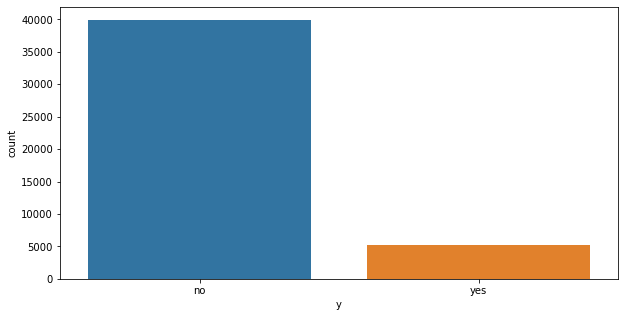

In [17]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="y", data=df_bank_full)
plt.show()

Berdasarkan hasil diatas, sebanyak 39919 yang belum mau menjadi nasabah dan 5289 sudah menjadi nasabah di bank tersebut. Kita juga dapat melihat perbedaan yang signifikan.

### Distribusi masing-masing kolom numerik

In [19]:
df_bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,40.200562,0.580362
std,10.618823,3044.794660,8.322417,257.527769,3.097582,100.131506,2.303513
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


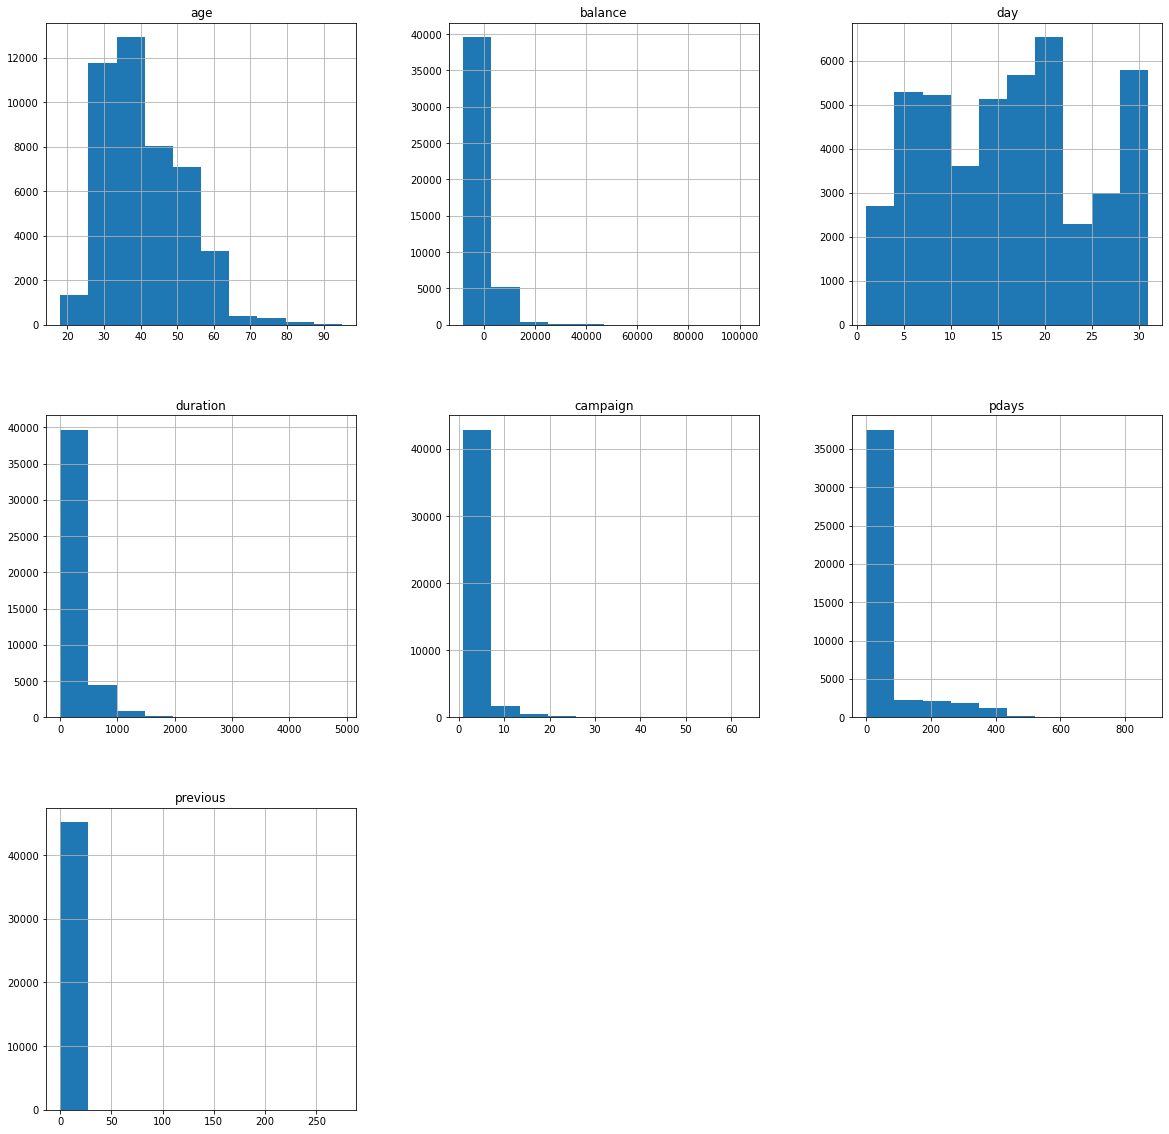

In [20]:
# visualisasi
df_bank_full.hist(figsize=(20, 20))
plt.show()

### Mendeteksi Outlier

Kita akan mendeteksi outlier berdasarkan usia client.

<AxesSubplot:>

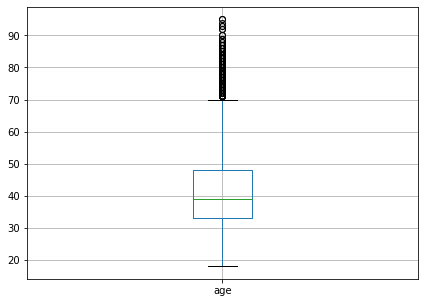

In [21]:
df_bank_full.boxplot(
    column = ['age'],
    figsize=(7,5))

Menurut hasil diatas, usia lebih dari 70 tahun merupakan outliers pada data. Selanjutnya kita kan menghitung jumlah client yang berada diatas usia 70 tahun.

In [23]:
df_bank_full[df_bank_full['age']>70].count()

age          487
job          487
marital      487
education    487
default      487
balance      487
housing      487
loan         487
contact      487
day          487
month        487
duration     487
campaign     487
pdays        487
previous     487
poutcome     487
y            487
dtype: int64

Sebanyak 487 client dengan usia diatas 70 tahun. Selanjutnya kita kan melihat apakah client dengan umur yang diatas 70 tahun merupakan nasabah atau bukan?

In [24]:
df_bank_full[(df_bank_full['age']>70) & (df_bank_full['y']=='yes')]['y'].count()

218

Sebanyak 218 client yang usianya diatas 70 tahun merupakan nasabah.

Berikutnya kita akan melihat outliers untuk kolom balance, duration, campaign, pdays dan previous.

<AxesSubplot:>

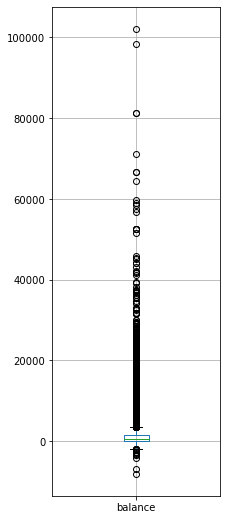

In [25]:
df_bank_full.boxplot(
    column = ['balance'],
    figsize=(3,9)
)

<AxesSubplot:>

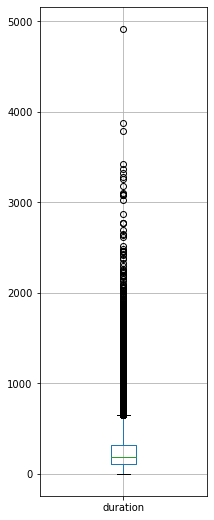

In [26]:
df_bank_full.boxplot(
    column = ['duration'],
    figsize=(3,9)
)

<AxesSubplot:>

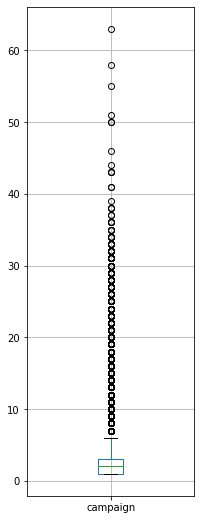

In [27]:
df_bank_full.boxplot(
    column = ['campaign'],
    figsize=(3,9)
)

<AxesSubplot:>

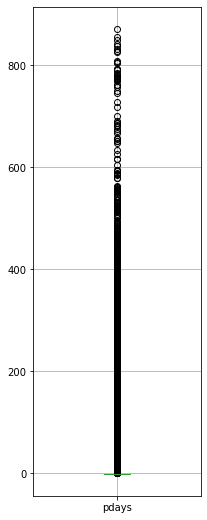

In [28]:
df_bank_full.boxplot(
    column = ['pdays'],
    figsize=(3,9)
)

<AxesSubplot:>

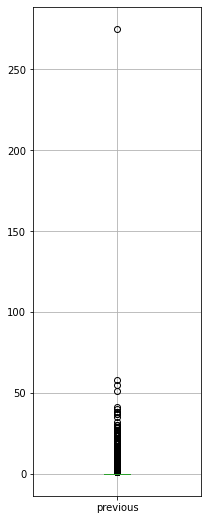

In [29]:
df_bank_full.boxplot(
    column = ['previous'],
    figsize=(3,9)
)

Menurut hasil diatas, ada satu data di previous yang nilainya jauh dari data lainnya. Maka, kita akan menghapus data tersebut.

In [30]:
df_previous_outlier = df_bank_full[df_bank_full['previous']>250].index
df_bank_full.drop(df_previous_outlier, inplace=True)
df_bank_full.shape

(45207, 17)

Berdasarkan hasil di atas, outlier data berhasil dihapus. Selanjutnya, data category akan dipetakan ke dalam bentuk angka untuk mempermudah analisis.

Adapun pemetaan setiap nilai dari data category dapat dilihat seperti berikut.

In [31]:
df_bank_full['month']= df_bank_full['month'].replace({'jan':1, 'feb':2,'mar':3,'apr':4,
                                                      'may':5,'jun':6, 'jul':7,'aug':8,
                                                      'sep':9,'oct':10,'nov':11,'dec':12})

df_bank_full['education'] = df_bank_full['education'].replace({'primary':1,'secondary':2,
                                                               'tertiary':3,'unknown':4})

df_bank_full['marital'] = df_bank_full['marital'].replace({'single':1,'married':2,'divorced':3})

df_bank_full['housing'] = df_bank_full['housing'].replace({'yes':1, 'no':0})

df_bank_full['default'] = df_bank_full['default'].replace({'yes':1, 'no':0})

df_bank_full['loan'] = df_bank_full['loan'].replace({'yes':1, 'no':0})

df_bank_full['job']= df_bank_full['job'].replace({'admin.':1, 'blue-collar':2,'entrepreneur':3,'housemaid':4,
                                                  'management':5,'retired':6, 'self-employed':7,'services':8,
                                                  'student':9,'technician':10,'unemployed':11,'unknown':12})

df_bank_full['y'] = df_bank_full['y'].replace({'yes':1, 'no': 0})

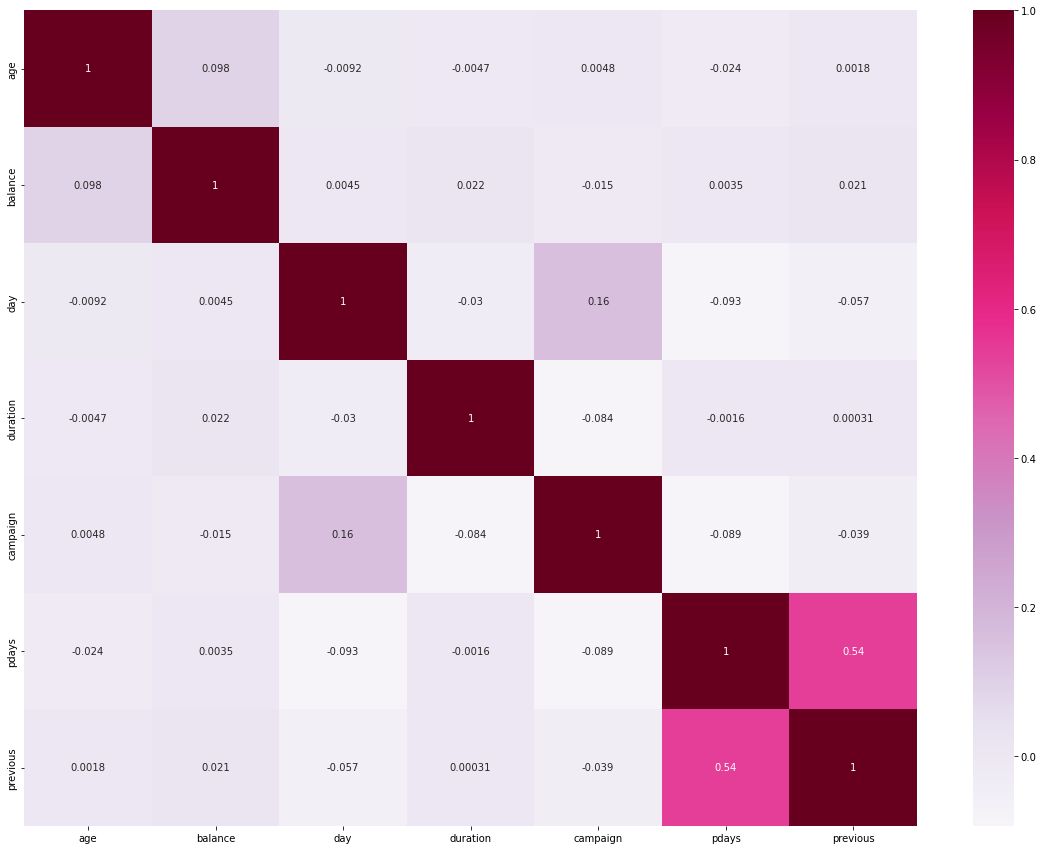

In [32]:
# Visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize=(20, 15))
ax = sns.heatmap(df_bank_full.corr(), annot=True, cmap="PuRd")

Selanjutnya, akan dilihat kecenderungan klien (berdasarkan pendidikan) terhadap keputusannya dalam memilih apakah akan bergabung menjadi nasabah.

In [33]:
print(df_bank_full.groupby(['y','education']).size())

y  education
0  1             6259
   2            20750
   3            11304
   4             1605
1  1              591
   2             2450
   3             1996
   4              252
dtype: int64


Berdasarkan hasil diatas diketahui perbandingan antara pendidikan unknown antara menjadi nasabah dan tidak. Ada 1605 client dengan pendidikan unknown memilih tidak menjadi nasabah.

Selanjutnya, akan dilihat kecenderungan klien (berdasarkan marital) terhadap keputusannya dalam memilih apakah akan bergabung menjadi nasabah.

In [34]:
print(df_bank_full.groupby(['y','marital']).size())

y  marital
0  3           4585
   2          24455
   1          10878
1  3            622
   2           2755
   1           1912
dtype: int64


Berdasarkan hasil diatas, diketahui sebanyak 24455 client yang sudah menikah memilih tidak menjadi nasabbah dibank tersebut.

Sekarang kita akan melihat visualisasi client yang nasabah dan tidak jadimenjadi nasabah berdasarkan usianya.

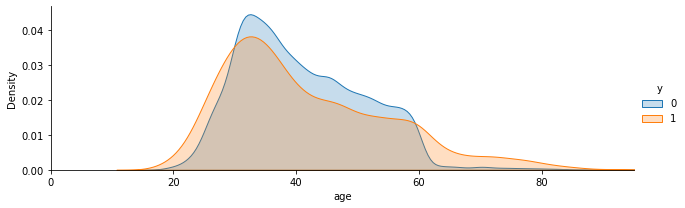

In [35]:
df_age = sns.FacetGrid(df_bank_full, hue="y", aspect = 3)
df_age.map(sns.kdeplot, 'age', shade=True)
df_age.set(xlim=(0, df_bank_full['age'].max()))
df_age.add_legend()

plt.show()

Berdasarkan hasil visualisasi diatas, dapat dilihat usia antara 30-40 tahun, banyak client yang tidak tergabung menjadi nasabah bank.

Selanjutnya, kita akan membentuk grafik batang (bar) untuk melihat kecenderungan client dalam memutuskan apakah mereka akan bergabung menjadi nasabah bank atau tidak berdasarkan housing, default, dan loan.

In [36]:
def barh_chart(feature):
    yes = df_bank_full[df_bank_full['y']==1][feature].value_counts()
    no = df_bank_full[df_bank_full['y']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes', 'No']
    df.plot(kind = 'barh', stacked = True, figsize = (10,5))
    

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

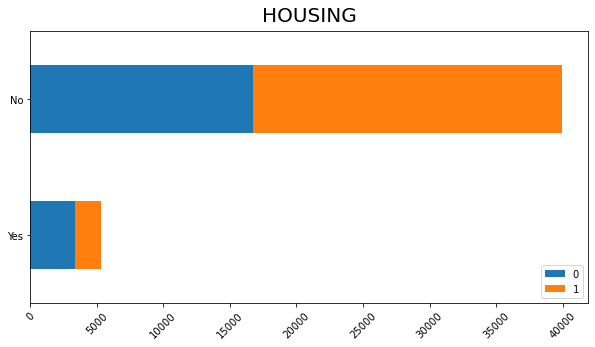

In [37]:
barh_chart('housing')
plt.title("HOUSING", pad=10, fontsize = 20)
plt.xticks(rotation = 45)

Berdasarkan hasil diatas, diketahui bahwa kepemilikan pinjaman atas nama pribadi, baik kelompok client tanpa pinjaman (0) maupun dengan pinjaman (1) memiliki kecenderungan untuk tidak bergabung menjadi nasabah bank. Namun, perlu diperhatikan bahwa sebagian besar client bank pada dataset merupakan orang dengan tanggungan pinjaman atas nama pribadi.

---
# Persiapan Model Machine Learning
---

Model Machine Learning yang akan kita buat :
1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix

Data Preparation

Sebelumnya kita akan menghapus ('contact', 'poutcome') tidak memiliki pengaruh terhadap keputusan klien untuk bergabung menjadi nasabah bank atau tidak.

In [38]:
df_bank_full = df_bank_full.drop(columns=['contact','poutcome'])

Selanjutnya menyiapkan data training dan data testing.

In [39]:
X = df_bank_full.drop('y', axis=1)
y = df_bank_full['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =1)

---
### Logistic Regression

In [40]:
lr_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
lr_model.fit(X_train, y_train)
logreg_pred = lr_model.predict(X_test)

print(classification_report(y_test, logreg_pred))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9974
           1       0.57      0.20      0.29      1328

    accuracy                           0.89     11302
   macro avg       0.73      0.59      0.62     11302
weighted avg       0.86      0.89      0.86     11302

Accuracy: 0.8879844275349495


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 89%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

---
### K-Nearest Neighbour

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                                 algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None)

# Melatih model menggunakan data train
knn_model.fit(X_train, y_train)

# Hasil predict
knn_pred = knn_model.predict(X_test)

print(classification_report(knn_pred,y_test))
print("Accuracy:",metrics.accuracy_score( knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10590
           1       0.27      0.50      0.35       712

    accuracy                           0.88     11302
   macro avg       0.62      0.70      0.64     11302
weighted avg       0.92      0.88      0.90     11302

Accuracy: 0.8824986728012741


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 88%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

---
### Support Vector Machine

In [42]:
svm_model = LinearSVC()
svm_model.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [43]:
svm_score_train = svm_model.score(X_train, y_train)
print(svm_score_train)

0.6995723344639434


In [44]:
svm_model.fit(X_test,y_test)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [45]:
svm_score_test = svm_model.score(X_test, y_test)
print(svm_score_test)

0.875862679171828


In [46]:
svm_pred = svm_model.predict(X_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10559
           1       0.25      0.45      0.32       743

    accuracy                           0.88     11302
   macro avg       0.61      0.68      0.63     11302
weighted avg       0.91      0.88      0.89     11302



Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 87%. Akan tetapi, hasil precision, recall, dan f1-score untuk kelas 'yes' (subscribe) masih kurang baik.

---
### Decision Tree

In [47]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = dt_model.fit(X_train,y_train)

# Predict the response for test dataset
dt_pred = dt_model.predict(X_test)

print(classification_report(y_test, dt_pred))
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9974
           1       0.45      0.48      0.46      1328

    accuracy                           0.87     11302
   macro avg       0.69      0.70      0.69     11302
weighted avg       0.87      0.87      0.87     11302

Accuracy: 0.8690497257122634


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 87%.

---
### Random Forest

In [48]:
rf_model = RandomForestClassifier(n_estimators=100)
 
rf_model.fit(X_train,y_train) 

randfor_pred = rf_model.predict(X_test)

print(classification_report(y_test, randfor_pred))
print("Accuracy:",metrics.accuracy_score(y_test, randfor_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9974
           1       0.63      0.39      0.48      1328

    accuracy                           0.90     11302
   macro avg       0.78      0.68      0.71     11302
weighted avg       0.89      0.90      0.89     11302

Accuracy: 0.9016988143691382


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 90%.

---
### Naive Bayes


In [49]:
nb_model = GaussianNB()

nb_model.fit(X_train,y_train)

nb_pred = nb_model.predict(X_test)

print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9974
           1       0.41      0.39      0.40      1328

    accuracy                           0.86     11302
   macro avg       0.66      0.66      0.66     11302
weighted avg       0.86      0.86      0.86     11302

Accuracy: 0.8619713325075208


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 86%.

---
### Confusion Matrix

Logistik Regression Confusion Matrix

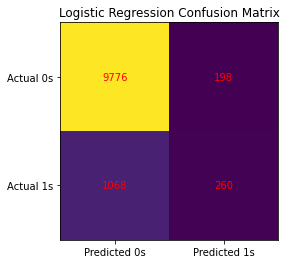

In [50]:
cm = confusion_matrix(y_test, logreg_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Logistic Regression Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

K-Nearest Neighbour Confusion Matrix

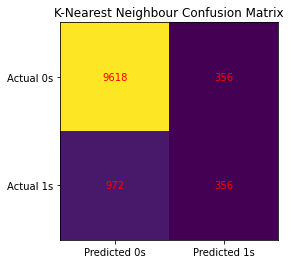

In [51]:
cm = confusion_matrix(y_test, knn_pred)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title("K-Nearest Neighbour Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Suport Vector Machine Confusion Matrix

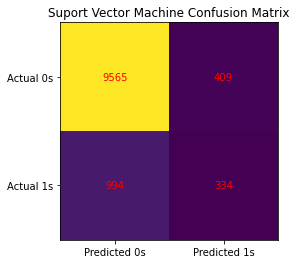

In [53]:
cm = confusion_matrix(y_test, svm_pred)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title("Suport Vector Machine Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Decision Tree Confusion Matrix

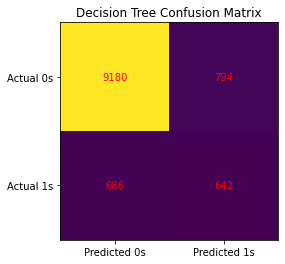

In [54]:
cm = confusion_matrix(y_test, dt_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Decision Tree Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Random Forest Confusion Matrix

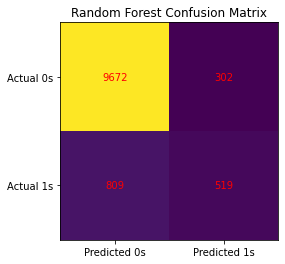

In [55]:
cm = confusion_matrix(y_test, randfor_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Random Forest Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Naive Bayes Confusion Matrix

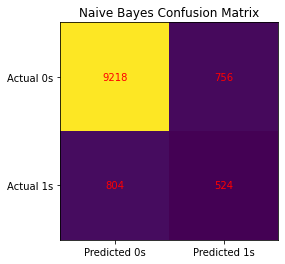

In [56]:
cm = confusion_matrix(y_test, nb_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Naive Bayes Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

---
# KESIMPULAN

Berdasarkan keseluruhan hasil diatas, dapat diambil kesimpulan :
1. Sebanyak 39919 client yang belum menjadi nasabah dan 5289 client sudah menjadi nasabah di bank tersebut.
2. Dari beberapa pemodelan Machine Learning yang sudah dilakukan, semuanya memiliki akurasi yang cukup baik. Adapun hasil akurasi dari model-model Machine Learning yang digunakan :
     1. Logistic Regression = 89%
     2. K-Nearest Neighbour = 88%
     3. Support Vector Machine = 87%
     4. Decision Tree = 87%
     5. Random Forest = 90%
     6. Naive Bayes = 86%
Walaupun akurasi dari setiap model yang digunakan cukup baik, tetapi precision, recall, dan f1-score untuk salah satu kelas variabel target masih kurang baik. Hal ini bisa saja disebabkan oleh ketidakseimbangan data target (imbalance data) sehingga diperlukan eksplorasi yang lebih mendalam terhadap data pada tahap EDA.
